In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path

In [3]:
BASE_PATH = "/mnt/Data/data"
base_dir = Path(BASE_PATH).resolve()

In [4]:
config = {
    "config_folder": "../data/mearec",
    "recordings_folder": str(base_dir / "output/recordings"),
    "templates_folder": str(base_dir / "output/templates")
}

In [5]:
from eapprocessor.mearec.api import generate_templates, generate_recordings, load_recordings

We will generate a reference recordings with no noise, only with spike trains

In [6]:
fs_list = [24000, 20000, 16000]
noise_level = 7

In [7]:
for fs in fs_list:
    generate_recordings(config_folder=config["config_folder"],
                        templates_folder=config["templates_folder"],
                        recordings_folder=config["recordings_folder"],
                        verbose=True, noise_level=noise_level, fs=fs)

{'spiketrains': {'n_exc': 7, 'n_inh': 3, 'f_exc': 5, 'f_inh': 15, 'st_exc': 1, 'st_inh': 3, 'min_rate': 0.5, 'ref_per': 2, 'process': 'poisson', 'gamma_shape': 2, 't_start': 0, 'duration': 10}, 'cell_types': {'excitatory': ['PC', 'SS', 'SP'], 'inhibitory': ['AC', 'BP', 'BC', 'BTC', 'ChC', 'DBC', 'MC', 'NGC']}, 'seeds': {'spiketrains': 100, 'templates': 100, 'convolution': 100, 'noise': 100}, 'templates': {'min_dist': 25, 'min_amp': 50, 'max_amp': 300, 'n_overlap_pairs': None, 'xlim': None, 'ylim': None, 'zlim': None, 'overlap_threshold': 0.9, 'n_jitters': 10, 'upsample': 8, 'pad_len': [3, 3]}, 'recordings': {'fs': 24000, 'dtype': 'float32', 'overlap': False, 'extract_waveforms': False, 'sync_rate': None, 'sync_jitt': 1, 'chunk_duration': 0, 'modulation': 'electrode', 'sdrand': 0.05, 'bursting': False, 'bursting_units': None, 'exp_decay': 0.2, 'n_burst_spikes': 10, 'max_burst_duration': 100, 'shape_mod': False, 'shape_stretch': 30.0, 'n_bursting': None, 'noise_level': 7, 'noise_mode': '

In [8]:
noise_levels = [5,7,10,15,25]

In [9]:
all_recgen_list = [[load_recordings(datafolder=config["recordings_folder"],
                verbose=True, noise_level=noise_level, fs=fs) for noise_level in noise_levels]
               for fs in fs_list]

Found file /mnt/Data/data/output/recordings/recordings_10cells_Neuronexus-32_10.0_5uV_24000Hz_2021-12-02_10-59.h5
Loading recordings...
Done loading recordings...
Found file /mnt/Data/data/output/recordings/recordings_10cells_Neuronexus-32_10.0_7uV_24000Hz_2023-09-03_16-36.h5
Loading recordings...
Done loading recordings...
Found file /mnt/Data/data/output/recordings/recordings_10cells_Neuronexus-32_10.0_10uV_24000Hz_2021-12-02_11-00.h5
Loading recordings...
Done loading recordings...
Found file /mnt/Data/data/output/recordings/recordings_10cells_Neuronexus-32_10.0_15uV_24000Hz_2021-12-02_11-00.h5
Loading recordings...
Done loading recordings...
Found file /mnt/Data/data/output/recordings/recordings_10cells_Neuronexus-32_10.0_25uV_24000Hz_2021-12-02_11-00.h5
Loading recordings...
Done loading recordings...
Found file /mnt/Data/data/output/recordings/recordings_10cells_Neuronexus-32_10.0_5uV_20000Hz_2021-12-02_11-00.h5
Loading recordings...
Done loading recordings...
Found file /mnt/Dat

In [10]:
from eapprocessor.plot.signals import plot_transient_recordings

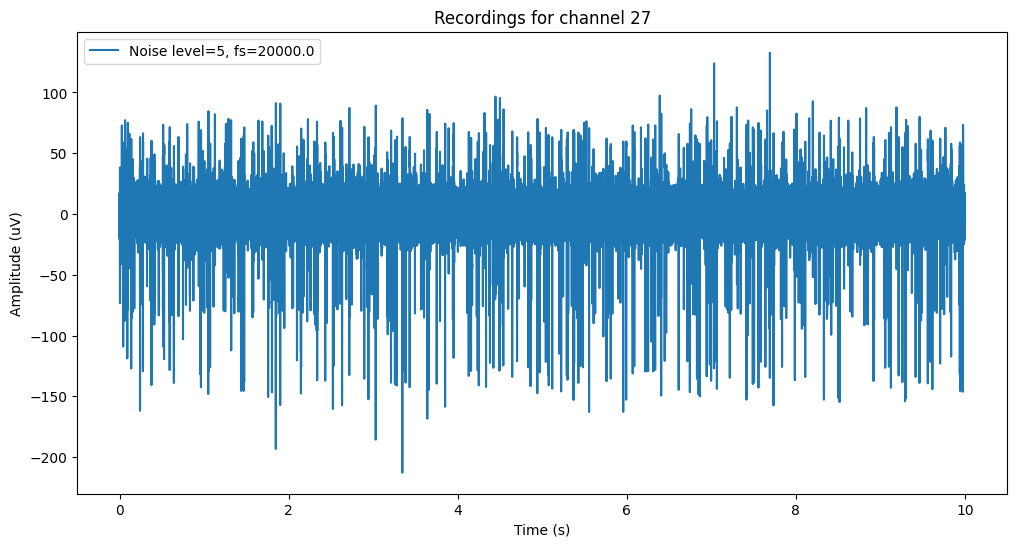

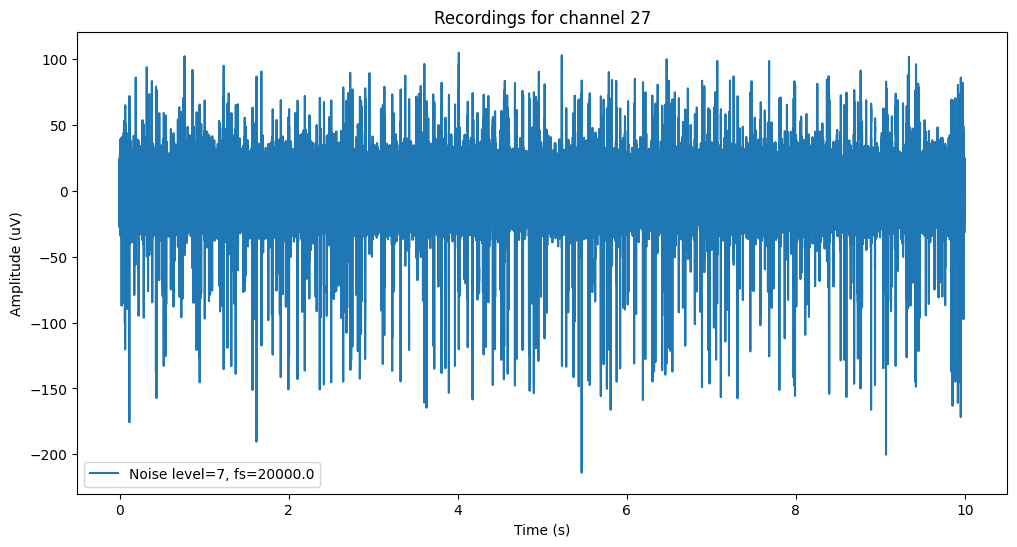

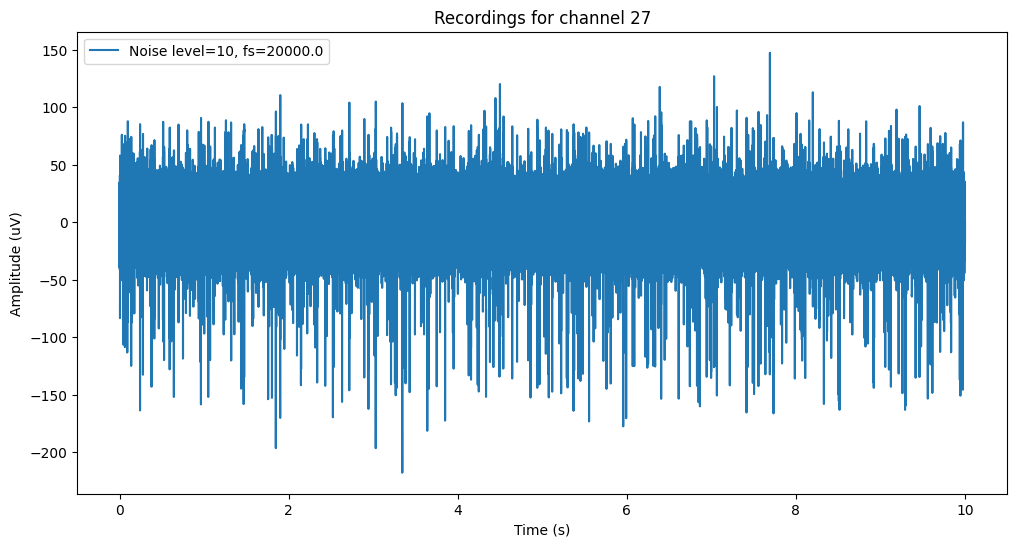

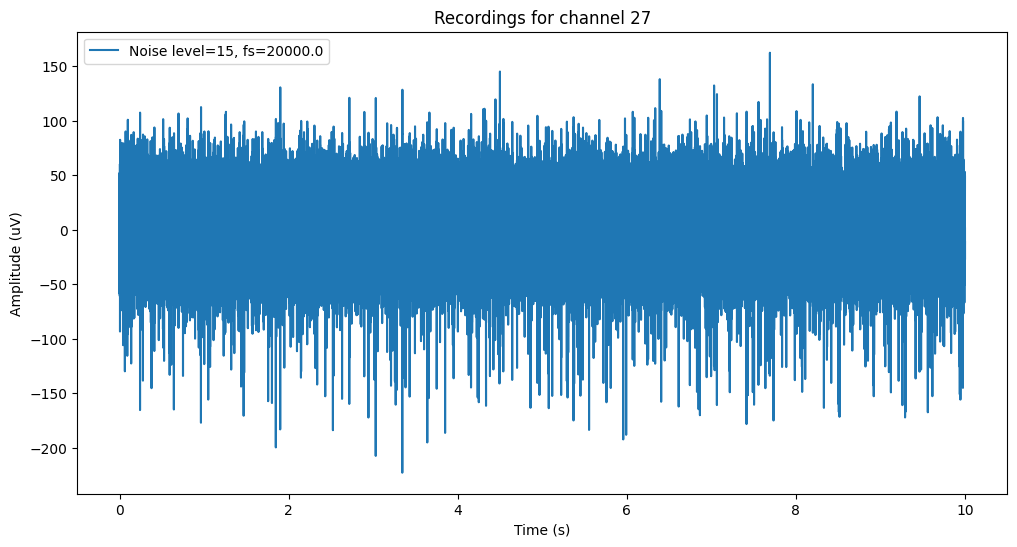

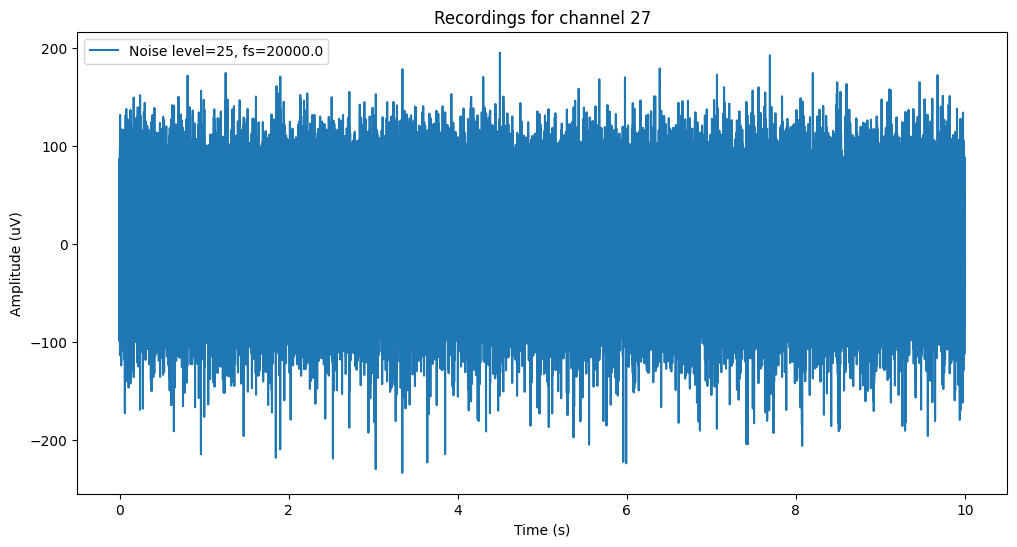

In [11]:
for recgen in all_recgen_list[1]:
    plot_transient_recordings(recgen, channels=[27])

In [62]:
import numpy as np
import matplotlib.pyplot as plt

In [84]:
ch_idx=27
fs=20000
fs_idx=fs_list.index(fs)

In [85]:
rec=np.array(all_recgen_list[fs_idx][0].recordings).T

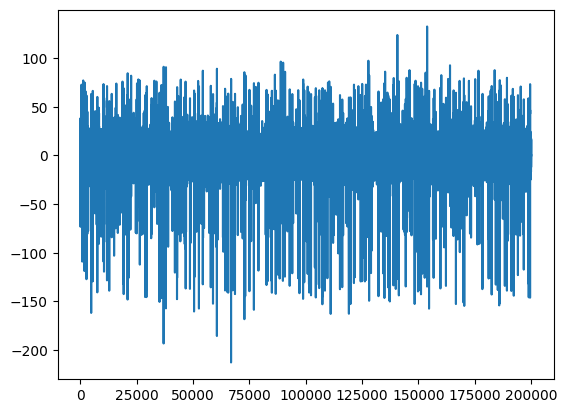

In [86]:
plt.plot(rec[ch_idx])

In [87]:
def get_rms(signal):
    return np.sqrt(np.mean(signal**2))

In [88]:
get_rms(rec[ch_idx])

14.524393

In [89]:
for noise_idx,noise in enumerate(noise_levels):
    c_rec=np.array(all_recgen_list[fs_idx][noise_idx].recordings).T
    rms=get_rms(c_rec[ch_idx])
    print(f"RMS for {noise}uV noise:\t {rms}uV")

RMS for 5uV noise:	 14.524393081665039uV
RMS for 10uV noise:	 20.231990814208984uV
RMS for 15uV noise:	 27.198511123657227uV
RMS for 25uV noise:	 42.388214111328125uV
